In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from ripser import ripser
from persim import plot_diagrams

from grass_utils import *
from atlas_covariant import *
from yao_utils_otra import *

Computing brute matrix...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 204.80it/s]

Done


In [2]:
data_dir = "data/klein"

X = np.load(data_dir+"/klein_uniform_10000.npy")

ac = atlas_covariant(X, 2)

n_charts = 64

aic_log = []

for _ in tqdm(range(n_charts)):
    ac.add_new_chart()
    aic_log.append(ac.get_model_aic())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:13<00:00,  4.62it/s]


In [3]:
def draw_chart_in_polar(ind):
    # Get points from chart
    X = ac.sample_uniformly_from_chart_by_ind(ind)
    # Get polar representation
    theta_list = []
    phi_list = []
    for j in range(X.shape[0]):
        x = X[j, :]
        theta, phi = find_closest_theta_phi_brute(x)
        theta_list.append(theta)
        phi_list.append(phi)
    # Draw points in polar representation
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot()
    ax.scatter(theta_list, phi_list, color="b")
    ax.set_xlim(0, np.pi)
    ax.set_ylim(0, twopi)
    ax.set_title("Chart "+str(ind))
    # Show graphic
    plt.show()

def draw_total_in_polar():
    # Get points from each chart
    Xs = []
    for ind in tqdm(range(ac.n_charts)):
        X = ac.sample_uniformly_from_chart_by_ind(ind)
        Xs.append(X)
    X = np.vstack(Xs)
    # Get polar representation
    theta_list = []
    phi_list = []
    for j in tqdm(range(X.shape[0])):
        x = X[j, :]
        theta, phi = find_closest_theta_phi_brute(x)
        theta_list.append(theta)
        phi_list.append(phi)
    # Draw points in polar representation
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot()
    ax.scatter(theta_list, phi_list, color="b")
    ax.set_xlim(0, np.pi)
    ax.set_ylim(0, twopi)
    ax.set_title("All charts")
    # Show graphic
    plt.show()

for j in range(n_charts):
    draw_chart_in_polar(j)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 488088/488088 [05:07<00:00, 1589.28it/s]


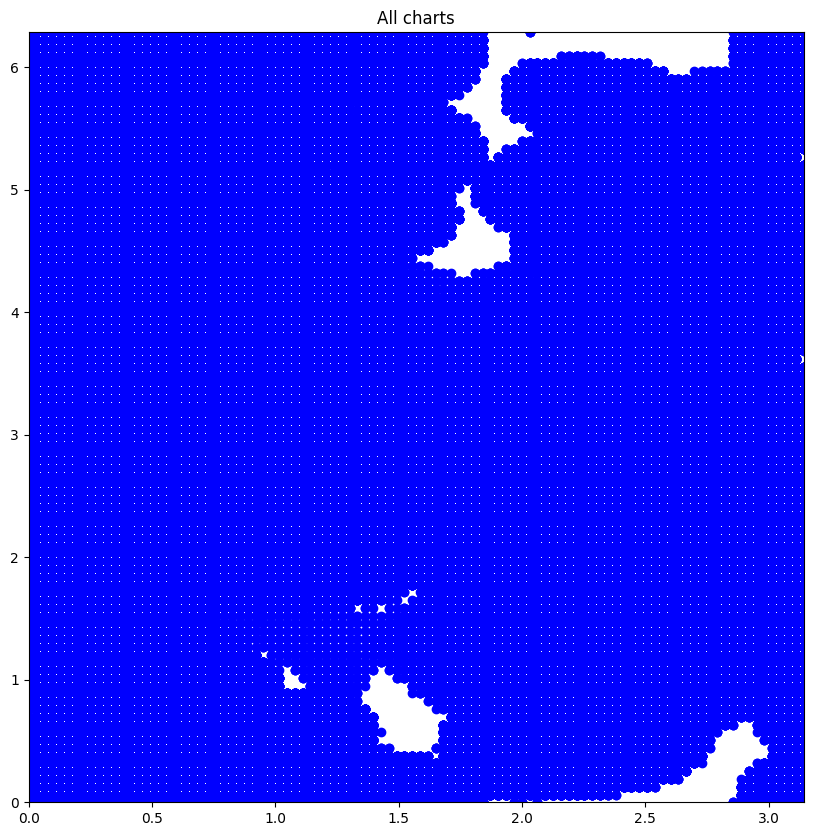

In [4]:
draw_total_in_polar()

2006.1837616771888


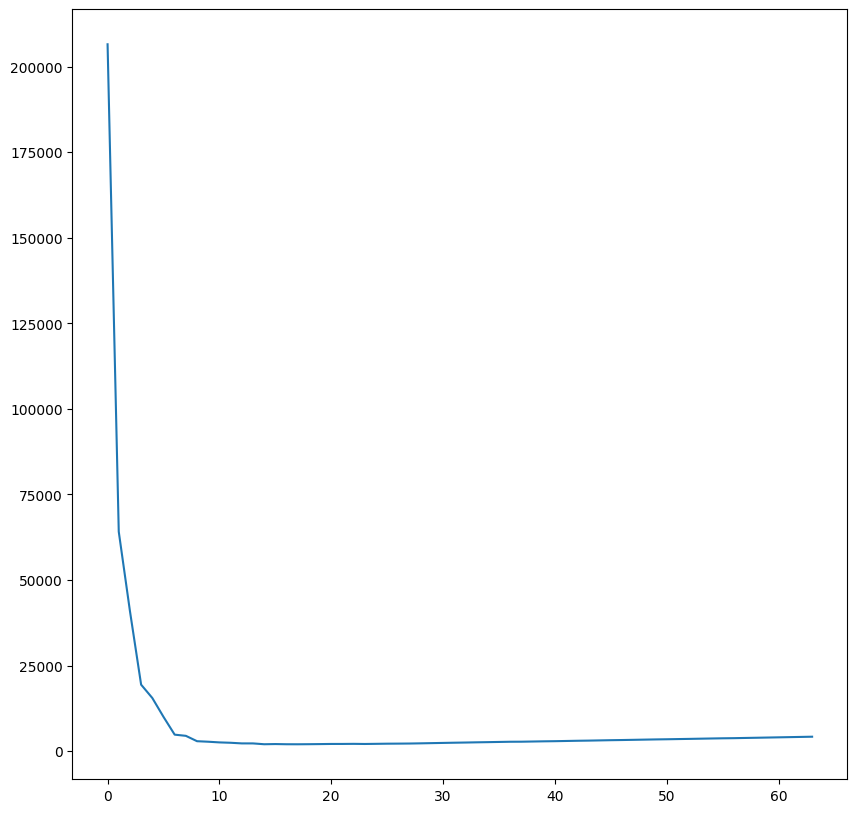

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.plot(aic_log)
print(np.min(aic_log))

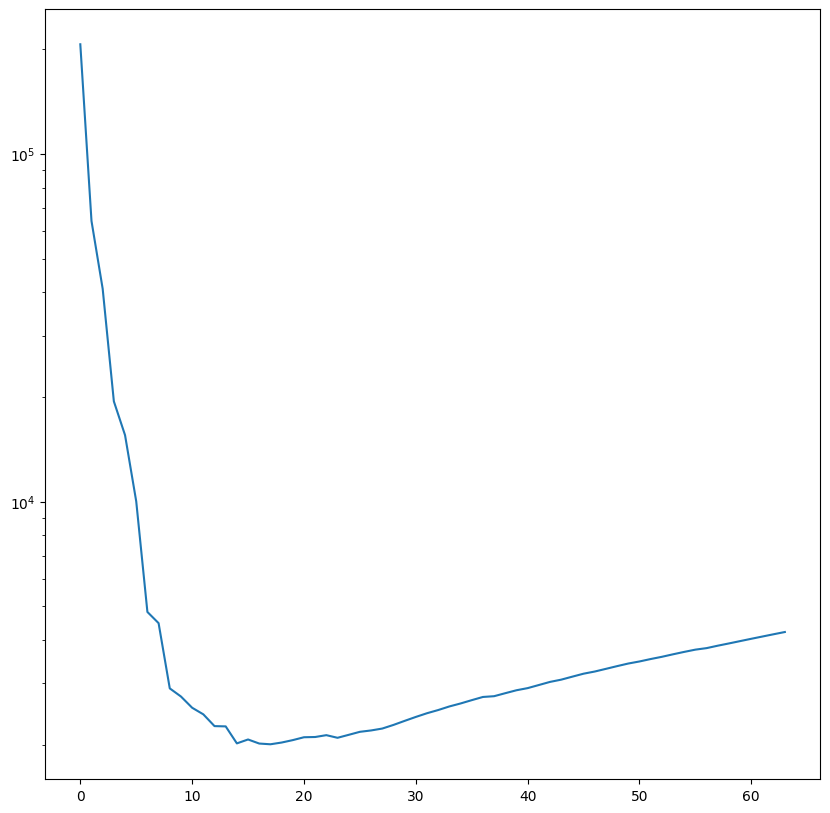

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.semilogy(aic_log)

In [7]:
ac = atlas_covariant(X, 2, next_rule="min")

n_charts = 20

aic_log = []

for _ in tqdm(range(n_charts)):
    ac.add_new_chart()
    aic_log.append(ac.get_model_aic())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.27it/s]


for j in range(n_charts):
    draw_chart_in_polar(j)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151904/151904 [01:30<00:00, 1675.15it/s]


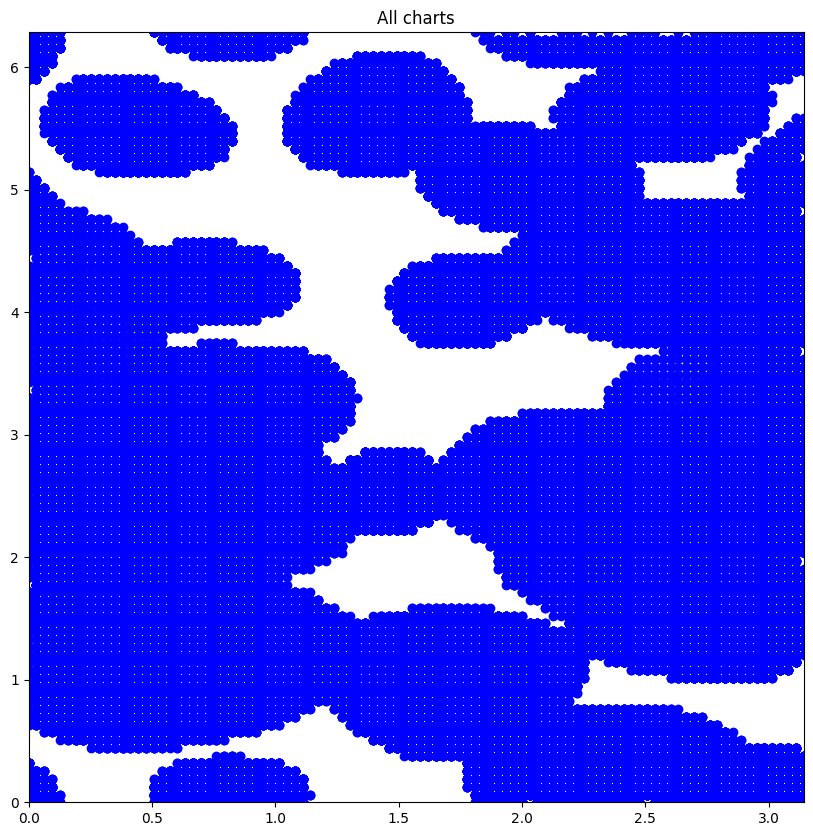

In [8]:
draw_total_in_polar()

1798.9807465866302


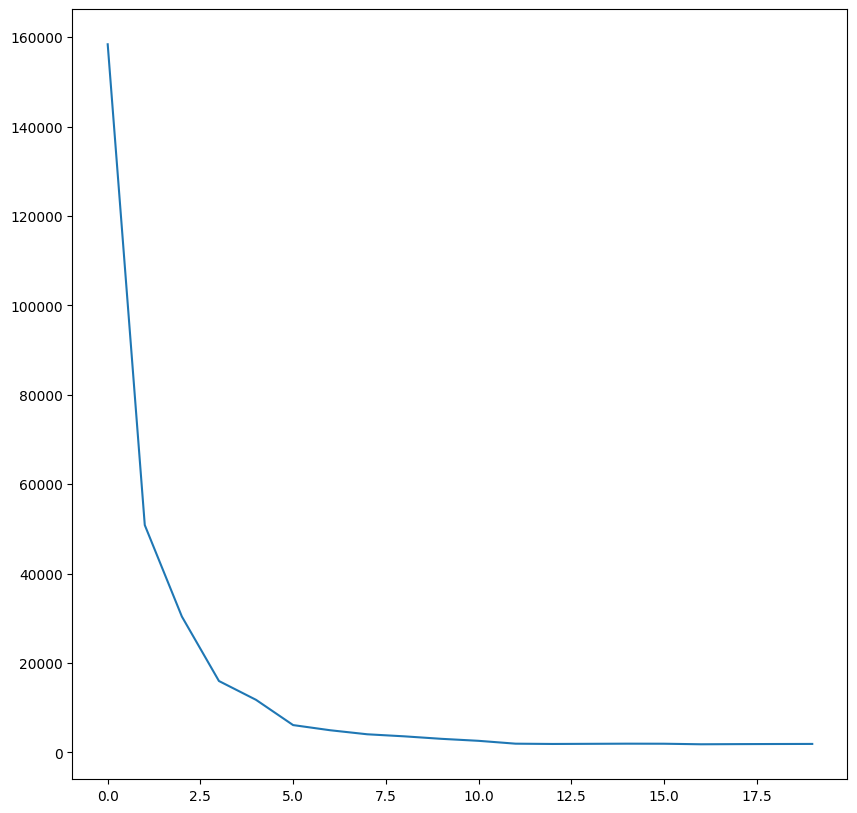

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.plot(aic_log)
print(np.min(aic_log))

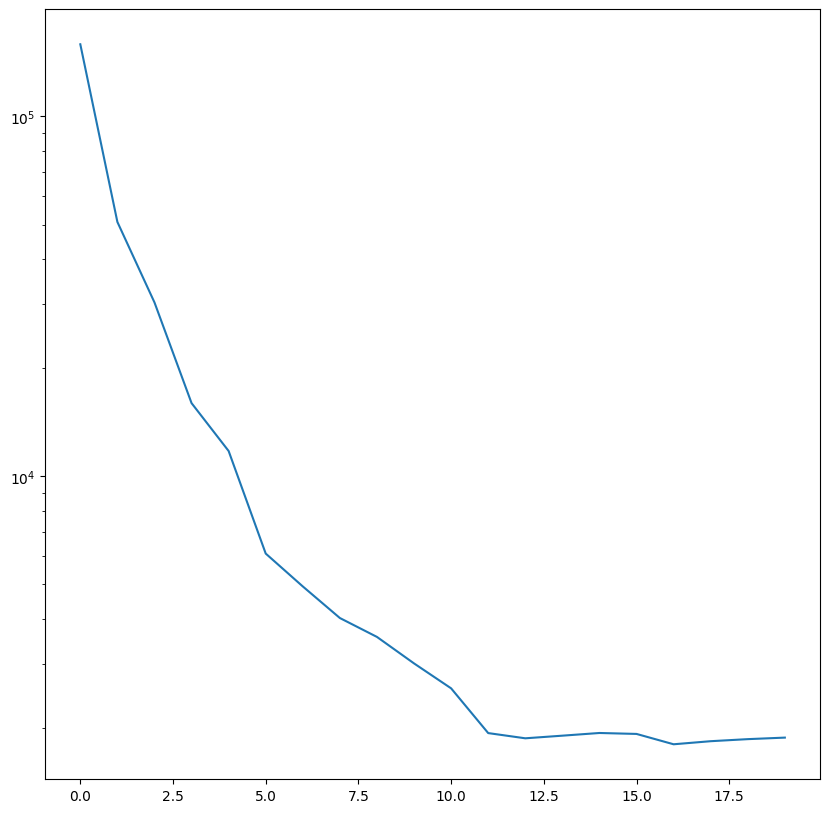

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.semilogy(aic_log)